<a href="https://colab.research.google.com/github/shubh-eng/ML/blob/master/classwork/exp2_ex2_J069.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'


In [4]:
df=pd.read_csv(path)

In [9]:
print(df.head)
print(df.info())
print(df.shape)


<bound method NDFrame.head of      symboling  normalized-losses         make  ... horsepower-binned diesel gas
0            3                122  alfa-romero  ...            Medium      0   1
1            3                122  alfa-romero  ...            Medium      0   1
2            1                122  alfa-romero  ...            Medium      0   1
3            2                164         audi  ...            Medium      0   1
4            2                164         audi  ...            Medium      0   1
..         ...                ...          ...  ...               ...    ...  ..
196         -1                 95        volvo  ...            Medium      0   1
197         -1                 95        volvo  ...              High      0   1
198         -1                 95        volvo  ...            Medium      0   1
199         -1                 95        volvo  ...            Medium      1   0
200         -1                 95        volvo  ...            Medium      0   

In [10]:
df.corr()['price']['engine-size']



0.8723351674455199

In [11]:
df.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [12]:
df['peak-rpm'].dtype

dtype('float64')

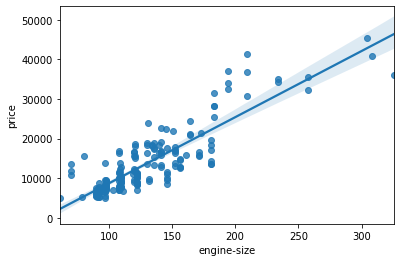

In [13]:
sns.regplot(df['engine-size'],df['price'])

As visible from the graph, they are positively correlated as price increases with increasing engine size

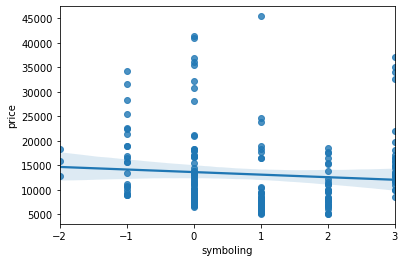

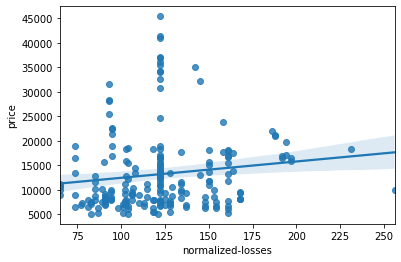

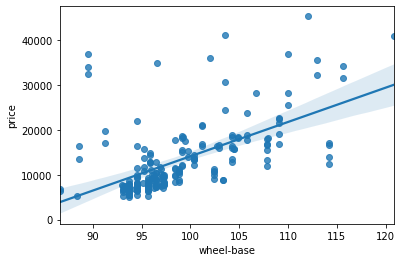

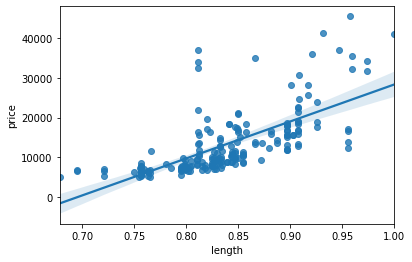

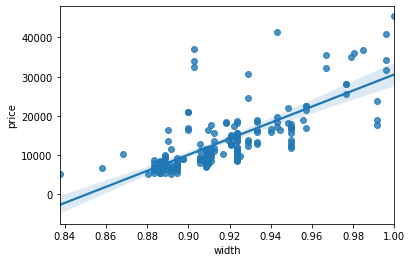

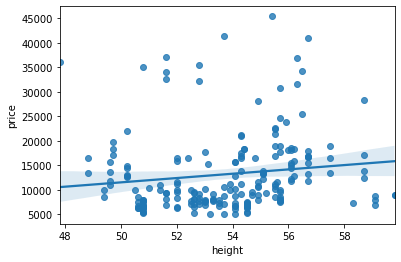

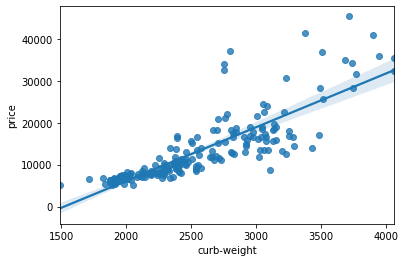

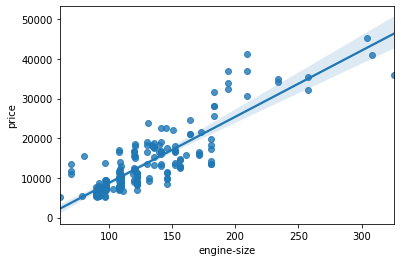

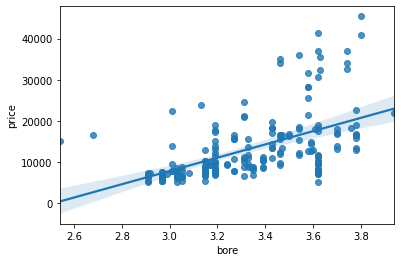

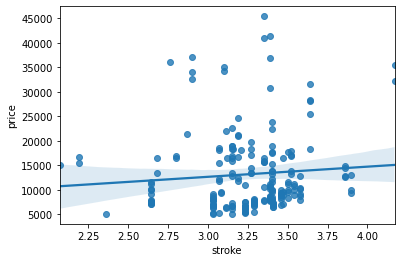

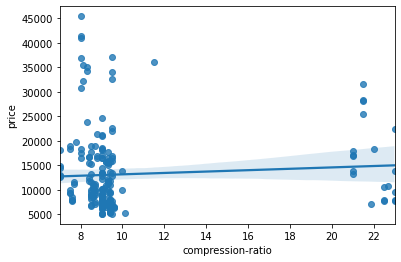

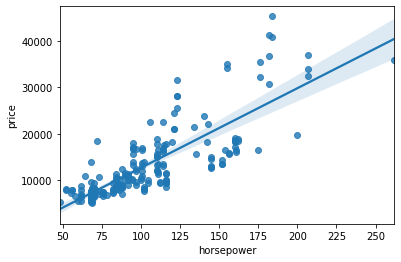

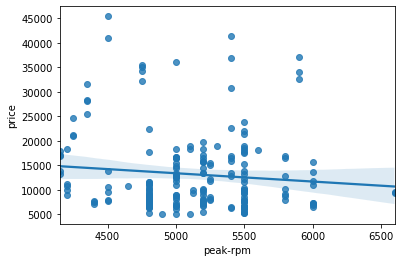

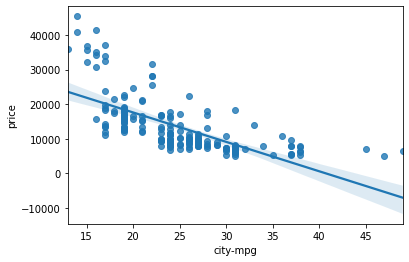

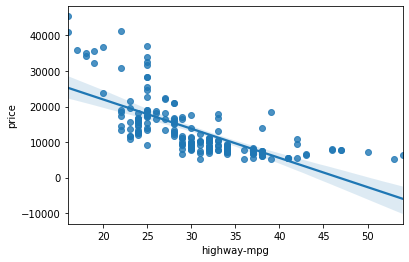

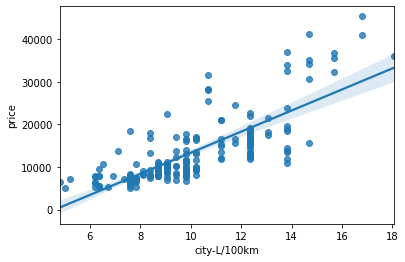

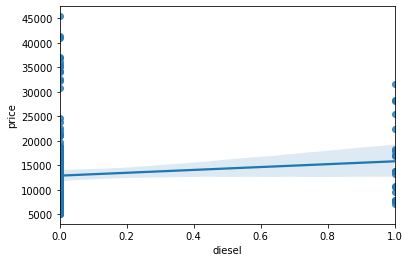

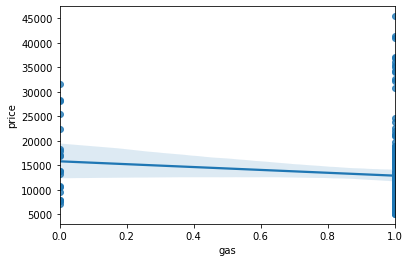

In [40]:
for i in df.describe().columns:
    if i!='price':
        sns.regplot(y='price', x=i, data = df)
        plt.show()

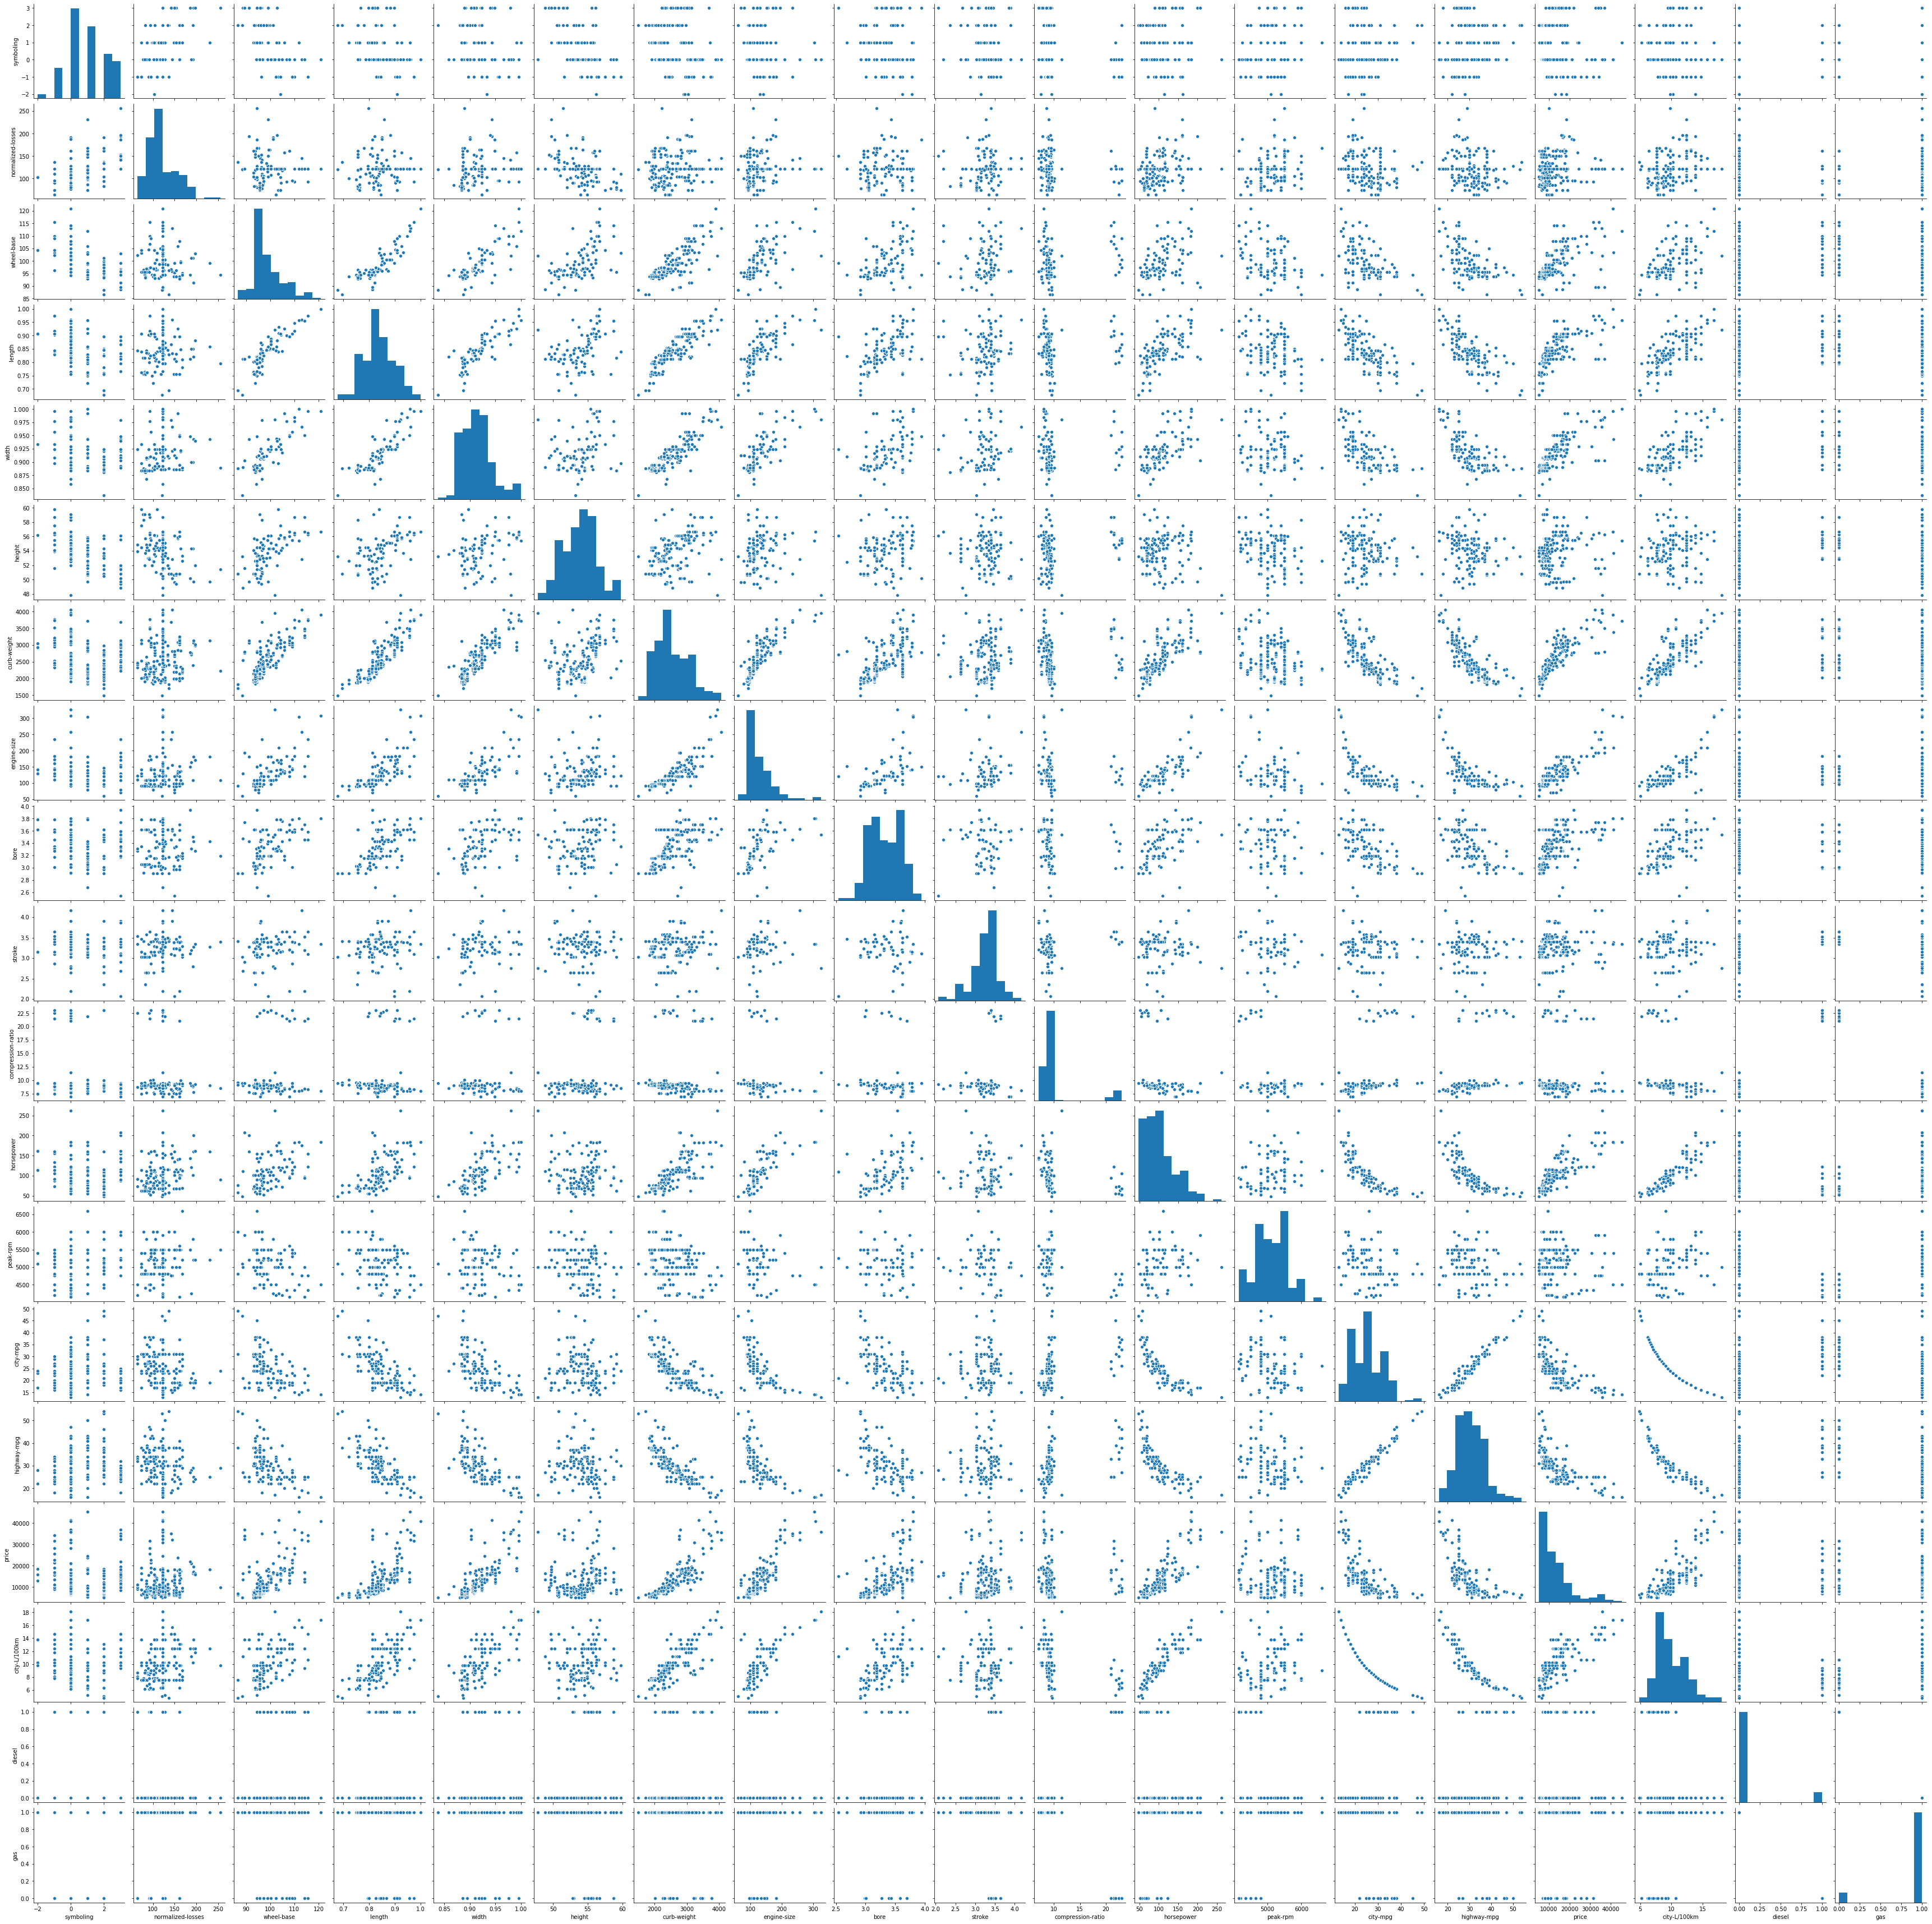

In [18]:
l=sns.pairplot(df)

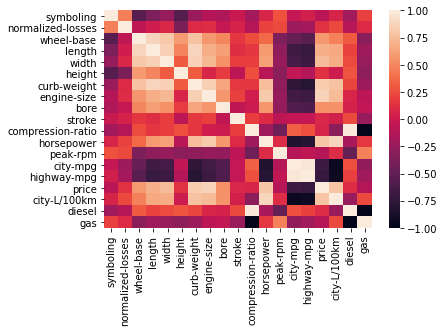

In [19]:
sns.heatmap(df.corr())

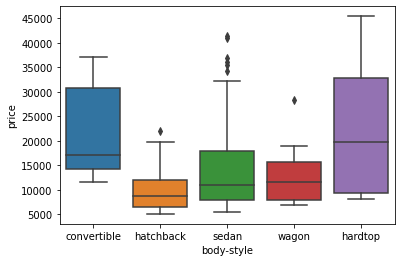

In [20]:
sns.boxplot(x='body-style',y='price',data=df)

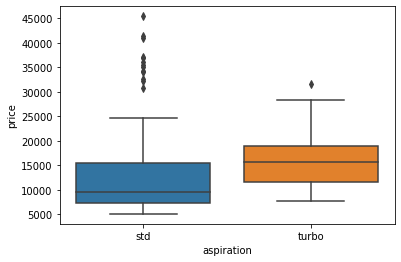

In [21]:
p=['aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']    
sns.boxplot(x='aspiration',y='price',data=df)

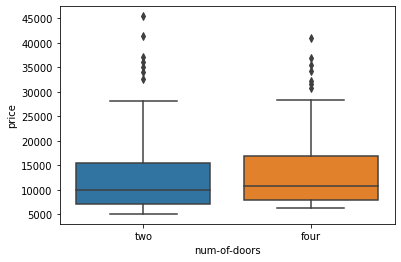

In [22]:
sns.boxplot(x='num-of-doors',y='price',data=df)

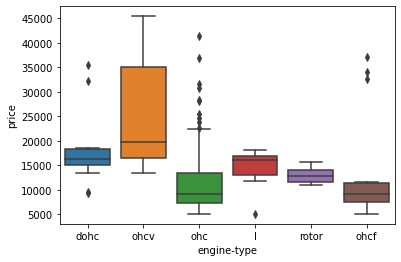

In [23]:
sns.boxplot('engine-type','price',data=df)

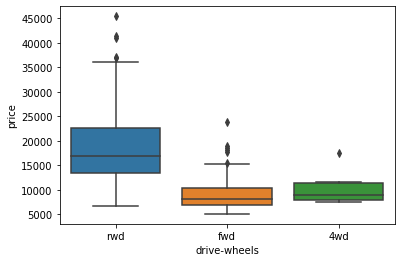

In [24]:
sns.boxplot('drive-wheels','price',data=df)

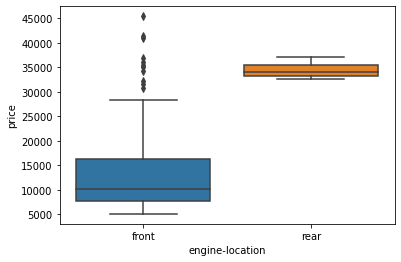

In [25]:
sns.boxplot('engine-location','price',data=df)

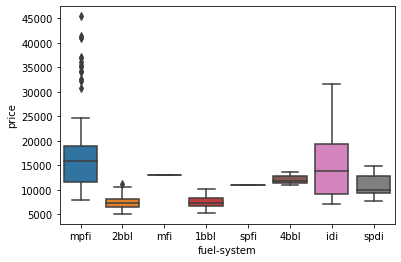

In [26]:
sns.boxplot('fuel-system','price',data=df)

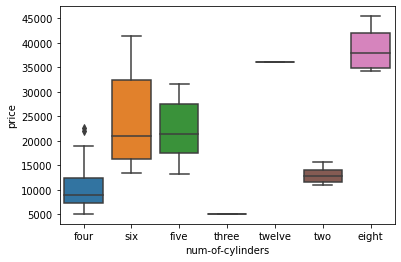

In [27]:
sns.boxplot('num-of-cylinders','price',data=df)


Observations :-

body-style - More or less the price range for every body type car is well defined with rarely any outliers, with the excpetion of sedan. There are a lot of sport sedans which cost more than the average sedan and cost more and hence are outliers in the data.
drive-wheelse - Majority of the cars have rear wheel drive and have very few outliers. Cars with front wheel or all wheel drive are fairly less and have a very short and well defined range for their price.
engine-locatione - Again, the majority of the cars have enging in the front and the and have a well defined price range. The cars with rear engines and the outliers of cars with front engines are majorly sports cars and that is why they are priced higher overall.
horsepower-binned - We can see that as the horsepower of a car increases, the price of the car also increases and the range to define the price of a car with low, medium or high horsepower gets broaded and broader.

In [28]:
for i in list(df.columns):
  print(df[i].describe())

count    201.000000
mean       0.840796
std        1.254802
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64
count    201.00000
mean     122.00000
std       31.99625
min       65.00000
25%      101.00000
50%      122.00000
75%      137.00000
max      256.00000
Name: normalized-losses, dtype: float64
count        201
unique        22
top       toyota
freq          32
Name: make, dtype: object
count     201
unique      2
top       std
freq      165
Name: aspiration, dtype: object
count      201
unique       2
top       four
freq       115
Name: num-of-doors, dtype: object
count       201
unique        5
top       sedan
freq         94
Name: body-style, dtype: object
count     201
unique      3
top       fwd
freq      118
Name: drive-wheels, dtype: object
count       201
unique        2
top       front
freq        198
Name: engine-location, dtype: object
count    201.000000
mean      98.797015
std        6.

In [29]:
cat_var=p
for i in cat_var:
  print(i,df[i].value_counts())

aspiration std      165
turbo     36
Name: aspiration, dtype: int64
num-of-doors four    115
two      86
Name: num-of-doors, dtype: int64
body-style sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
drive-wheels fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
engine-location front    198
rear       3
Name: engine-location, dtype: int64
engine-type ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64
num-of-cylinders four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
fuel-system mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64


After observing certain groups we can say that certain segments are most sold.
For eg. majority of the cars have standard aspiration, prefer 4 door cars over 2 doors, sedan and hatchback are the most sought after models. We can also see that people like their car engines in the front, and engine type of ohc with majority having 6 cylinders

In [30]:
df.groupby('drive-wheels').mean()['price']

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [31]:
for i in cat_var:
  print(df.groupby(i).mean()['price'])

aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64
drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64
engine-location
front    12884.085859
rear     34528.000000
Name: price, dtype: float64
engine-type
dohc     18116.416667
l        14627.583333
ohc      11567.358621
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64
num-of-cylinders
eight     38900.000000
five      22007.600000
four      10303.197452
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: price, dtype: float64
fuel-system
1bbl     7555.545455
2bbl     7433.203125
4bbl    12145.000000
idi     15838


We can see that the average price of cars with rear wheel drive is more than that of other cars. We can infer two major things from this:-
As we had seen earlier that a large proportion of the cars (38-39%) had rear wheel drive and the prices of these cars ranged from very low to very high, that is why we could be seeing a high average for cars with rear wheel drive.
We also see that the 4 wheel drive cars have a relatively high average even though there are very very few cars of that type (3-4%). We obtain this avergae because all the cars are relatively evenly priced and thus there is a lot less range in the price of the cars with 4 wheel drive which can affect the average price.

In [5]:
p=df.groupby(['drive-wheels','body-style']).mean()['price']
p

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

- We can see that there are no convertibles or hardtops in the 4 wheel drive and the avergae price of sedan cars is the most in a 4 wheel drive system.
- We can see that convertibles have a higher overall price average in forward wheel drive, while hatchback and hardtop and sedan and wagon are relatively close in their average pricing.
- We can see that rear wheel drive convertibles are the most expensive closely followed by the hardtop cars

In [8]:
p_table=p.unstack()

In [34]:
p_table

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


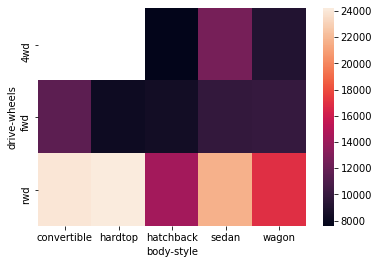

In [9]:
sns.heatmap(p_table)

In [38]:
for i in cat_var:
  for j in range(len(cat_var)):
    dum=df.groupby([i,cat_var[j]]).mean()['price']
    dum_table=dum.unstack
    print(dum_table)

<bound method Series.unstack of aspiration  aspiration
std         std           12542.181818
turbo       turbo         16254.805556
Name: price, dtype: float64>
<bound method Series.unstack of aspiration  num-of-doors
std         four            12509.847826
            two             12582.931507
turbo       four            17450.782609
            two             14138.846154
Name: price, dtype: float64>
<bound method Series.unstack of aspiration  body-style 
std         convertible    21890.500000
            hardtop        21356.000000
            hatchback       9312.089286
            sedan          13785.210526
            wagon          10973.600000
turbo       hardtop        28176.000000
            hatchback      12969.083333
            sedan          17307.833333
            wagon          17965.400000
Name: price, dtype: float64>
<bound method Series.unstack of aspiration  drive-wheels
std         4wd              9829.166667
            fwd              8724.029412
    

We can see that there are no cars with medium or low horsepower which have their engine in rear. These are majorly the sports cars of segment. We also see that of all the segments, the cars having engine in the front and with low horsepower have the lowest average price of any car.

In [ ]:
df.corr()['wheel-base']['price']

0.584641822265509

In [ ]:
import scipy.stats as stats

In [ ]:
#p,q=pd.factorize(df['drive-wheels'])
#df['drive-wheels']=p

In [ ]:
stats.f_oneway(df['drive-wheels'],df['price'])

ValueError: ignored

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df['drive_wheels']=df['drive-wheels']
model=ols('price~ C(drive_wheels)',data=df).fit()

aov_table=sm.stats.anova_lm(model,typ=1)

In [ ]:
print(aov_table)

                    df        sum_sq       mean_sq          F        PR(>F)
C(drive_wheels)    2.0  5.141172e+09  2.570586e+09  67.954065  3.394544e-23
Residual         198.0  7.490001e+09  3.782829e+07        NaN           NaN
